# Deep Learning with Keras: Introduction

*Authors: Evan Carey and Ra Inta*

*Copyright 2018-2020, BH Analytics, LLC*

## Overview

The purpose of this section is to cover the foundations of Artificial Neural Networks (ANNs), as well as their relationship to Deep Learning. We will start by using an ANN as a universal function approximator and then implement some key models using Keras and Tensorflow. 

* TensorFlow and Keras overview
* Using an ANN as an universal function approximator
* Reconstructing a linear regression with an ANN
* Defining the base input
* Building models by adding defined layers
* Introduction to loss functions, optimizers, and metrics
* Training models 
* Visualizing the error

## Libraries

We will start by calling the required libraries and checking the versions. This allows you to see if our installations match, and if you are missing any libraries. 

In [1]:
# colab specific code:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

#import os
#import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Get Version information
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Tensorflow version: {0}".format(tf.__version__))

Pandas version: 0.25.3
Matplotlib version: 3.1.1
Numpy version: 1.17.4
Tensorflow version: 2.0.0


I will also include some options here to make the notebooks look better as they render. You would not need this if you weren't using Jupyter Notebooks. 

In [3]:
# Set default figure size to be larger
# this may only work in matplotlib 2.0+!
from IPython.core.interactiveshell import InteractiveShell
matplotlib.rcParams['figure.figsize'] = [10.0, 6.0]
# Enable multiple outputs from jupyter cells
InteractiveShell.ast_node_interactivity = "all"

## Artificial Neural Networks (ANNs)

Artificial Neural Networks (ANNs; often further abbreviated to NNs) are inspired directly from our understanding of brain neurophysiology. An individual _neuron_ is the basic cell unit of our complex central nervous system. Each neuron takes inputs, in the form of electrical signals, and performs a number of simple transforms on these inputs, resulting in a simple output. These outputs are in turn fed as inputs to other neurons.

### Introduction to Keras and Tensorflow


**Tensorflow**

TensorFlow was developed by the Google Brain team, released to the Apache foundation in late 2015. It is a symbolic, high-performance, math library with specialized and generalized math objects, particularly _tensors_, a generalization of vector arithmetic and calculus (hence the name). The mental model for TensorFlow computations is a computational graph, defined by tensors. It is designed to be seamlessly applied to a range of hardware types (including GPUs and a specialized AI accelerator application-specific integrated circuit - ASIC, the TPU--- *Tensor Processing Unit*).  

**Tensorflow documentation:** https://www.tensorflow.org/

---
**Keras**

Keras is a high-level API to the neural network libraries CNTK, Theano and TensorFlow. Its high level of abstraction allows rapid prototyping of neural networks, with both convolution and recurrent network architectures. Its guiding principles are user-friendliness, modularity and to be easily extendible. Because it's written in Python, configuration and extension of functionality are relatively seamless within the Python eco-system. 

Keras is Greek for 'horn,' a reference to the vision-inducing spirits in the _Odyssey_.

**Keras documentation:** https://keras.io/

## Using neural networks as 'universal function approximators'

For the rest of this session, we will focus on implementing neural networks to approximate increasingly complex functions with only one input. This is a good place to start our understanding of how neural networks work, and it allows us to easily visualize the errors in the model as we train it. 

Let's say we have an unknown function that we wish to approximate. All we have observed are some inputs (X), and the corresponding outputs (Y). 

There is something called the 'Universal Approximation Theorem' (UAT), which states that **almost** any continuous function can be approximated by a feed-forward neural network with a single layer, with a finite number of neurons (width). 

*  However, the number of neurons needed may be really big
*  Furthermore, there is no guarantee we can find the correct combinations of weights as we train the model. 

So in practice, we will typically prefer more than one hidden layer (despite the UAT) in our models. 

Let's generate some simple datasets with a bit of noise, then see if we can approximate the underlying functions by developing a neural network. 

## Implementing a simple linear regression in a deep learning framework

We will start with a basic linear relationship. 

*  Let's simulate some basic data, then implement a linear relationship with noise as a test case to estimate the weights from the data.

The code below uses the numpy random module to simulate some data. 

In [4]:
# simulate linear model
np.random.seed(12)  # set seed for reproducability
n = 500
x1 = np.random.normal(loc=100,
                      scale=10,
                      size=n)
# simulate outcome
error_1 = \
    np.random.normal(loc=0,
                     scale=80,
                     size=n)
# map to outcome
y1 = 4 + 33*x1 + error_1

Now we can plot this relationship using seaborn to get an idea of what we just created:

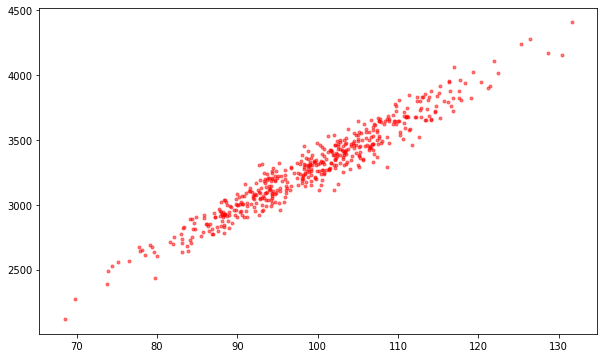

In [5]:
# plot relationship
plt.plot(x1, y1, 'r.', alpha=0.5)

Now that we have simulated the dataset, let's think about what neural network architecture would mimic a simple linear regression in this case. 

*  How many hidden layers should we have?
*  How many neurons per hidden layer?
*  What should the activation function be? 

answers: 

*  single layer
*  single neuron
*  linear activation function (identity)

### Implementing our first keras model

Now we will implement our first keras model. We will use the `Sequential` model for this session. This is a high-level API that allows us to easily specify a neural network. There is a more flexible API called the `functional` API, but we will not cover that here.

You start by declaring and defining the model. This includes:

*  Defining model architecture, such as number of hidden layers and number of neurons per hidden layer
*  Defining activation functions for any hidden layers
  
Next we compile the model, where we must:
  
*  Defining optimizer
*  Defining the loss function used during optimization
*  Defining additional metrics to track during training

In [6]:
# import needed parts
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
# Declare model
model = Sequential()

# Add layer
model.add(Dense(1,  # choose the number of neurons
                activation='linear',  # specify activation function
                input_dim=1))  # first layer must specify input shape (number of X's)

# compile model
model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mae'])

For the loss function, I chose to use mean squared error (mse). This corresponds to the typical maximum likelihood estimation of the mean, assuming a Gaussian distribution. This is a good default choice for a regression neural network, and corresponds to estimating the mean of the outcome. We will discuss other loss functions in future sessions. 

I chose to use the stochastic gradient descent as the optimizer here, although we will see some other options in later material.

Prior to fitting the model to the data (i.e. identifying optimal weights), we should standardize the model inputs. This is really important to do for NN's. 

In [7]:
# Capture mean and stdev
# we will want to use this mean and stdev on future data!
x_mean = np.mean(x1)
x_std = np.std(x1)

In [8]:
# write function to normalize
def norm(x,mean,std):
  return (x - mean) / std

In [9]:
# normalize the x values
x1_scale = norm(x1,x_mean,x_std)

Now we can fit this model using our data. One thing to note - we are shuffling and batching the gradient updates. This is called mini-batch. For every epoch, we are first randomly shuffling the data, then using batches of 32 data elements per gradient update. More info on why to do this is well explained by this stack overflow post: https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks

In [10]:
# fit this model/architecture to my data
model_history = \
    model.fit(x1_scale,
              y1,
              epochs=20,
              shuffle=True, #default setting
              batch_size=32) #default setting

Train on 500 samples
Epoch 1/20
500/500 [==============================] - 1s 1ms/sample - loss: 8258509.2360 - mae: 2846.2930
Epoch 2/20
500/500 [==============================] - 0s 40us/sample - loss: 4320901.9220 - mae: 2059.6140
Epoch 3/20
500/500 [==============================] - 0s 42us/sample - loss: 2267549.1580 - mae: 1489.8069
Epoch 4/20
500/500 [==============================] - 0s 48us/sample - loss: 1191136.4270 - mae: 1078.5916
Epoch 5/20
500/500 [==============================] - 0s 48us/sample - loss: 627416.7705 - mae: 781.0336
Epoch 6/20
500/500 [==============================] - 0s 45us/sample - loss: 331754.7291 - mae: 564.8577
Epoch 7/20
500/500 [==============================] - 0s 42us/sample - loss: 177234.6411 - mae: 409.4948
Epoch 8/20
500/500 [==============================] - 0s 46us/sample - loss: 96197.2176 - mae: 295.9595
Epoch 9/20
500/500 [==============================] - 0s 50us/sample - loss: 53647.1163 - mae: 215.0397
Epoch 10/20
500/500 [========

The output generally gives us per-epoch information. 

*  An epoch is one full pass through the data (forward propagation and backprop)
*  We see the time per epoch
*  We see the value of the loss function across all rows per epoch
*  We also see the 'metrics' per epoch

So how do we know if this model has done a good job? How many epochs is 'enough' epochs? Or even how many is 'too much'?

In this case with only one input, we can simply print the predictions and the original data to better understand the fit:

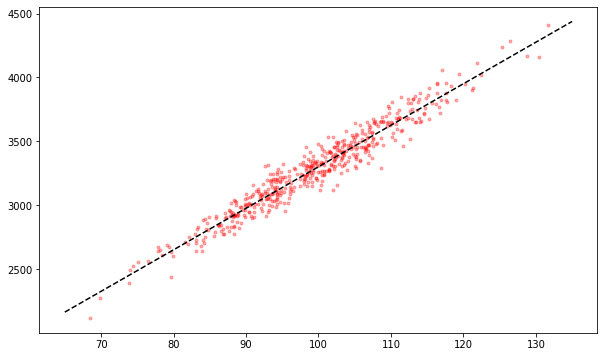

In [11]:
## plot data and predictions
## original data
plt.plot(x1, y1,'r.',alpha=0.3)
## generate regular points along the range of x and transform 
x1_range = np.linspace(65,135,200)
x1_range_scale = norm(x1_range,x_mean,x_std)
## make predictions and plot
plt.plot(x1_range, 
         model.predict(x1_range_scale),
         'k--')

The keras model object also returns the history of the fit when you call the fit method, which I saved here as `model_history`. If you don't save it, you can still access it through the model object using `model.history.history`, which is admittedly confusing. 

In [12]:
# saved return object
model_history.history
# model history from original object
model.history.history
# they are the same
# these are dictionaries (Python key-value pairs)

{'loss': [8258509.236,
  4320901.922,
  2267549.158,
  1191136.427,
  627416.7705,
  331754.729125,
  177234.6410625,
  96197.217625,
  53647.1163125,
  31398.244,
  19726.747234375,
  13642.433265625,
  10448.382765625,
  8763.4095234375,
  7901.2079609375,
  7442.218859375,
  7221.7008515625,
  7097.5290390625,
  7025.990859375,
  6992.56644921875],
 'mae': [2846.293,
  2059.614,
  1489.8069,
  1078.5916,
  781.03357,
  564.85767,
  409.4948,
  295.95947,
  215.03975,
  157.96906,
  119.18287,
  95.83115,
  83.09009,
  76.19435,
  72.434975,
  70.23506,
  69.04739,
  68.4094,
  67.999405,
  67.70955]}

{'loss': [8258509.236,
  4320901.922,
  2267549.158,
  1191136.427,
  627416.7705,
  331754.729125,
  177234.6410625,
  96197.217625,
  53647.1163125,
  31398.244,
  19726.747234375,
  13642.433265625,
  10448.382765625,
  8763.4095234375,
  7901.2079609375,
  7442.218859375,
  7221.7008515625,
  7097.5290390625,
  7025.990859375,
  6992.56644921875],
 'mae': [2846.293,
  2059.614,
  1489.8069,
  1078.5916,
  781.03357,
  564.85767,
  409.4948,
  295.95947,
  215.03975,
  157.96906,
  119.18287,
  95.83115,
  83.09009,
  76.19435,
  72.434975,
  70.23506,
  69.04739,
  68.4094,
  67.999405,
  67.70955]}

We can use this per-epoch history of the loss function to understand how quickly the model converged. Let's plot that:

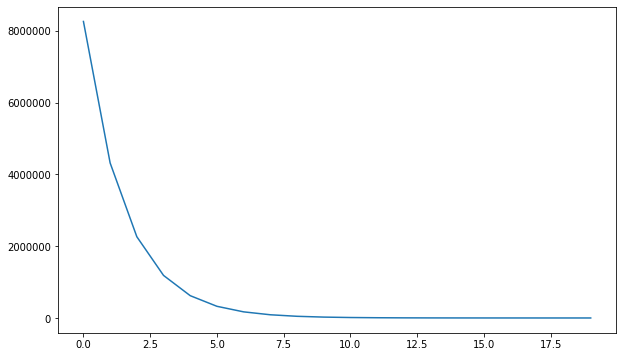

In [13]:
## plot the loss function per epoch
plt.plot(model.history.history['loss'])

This is a good looking convergence plot! Remember this, because this is what we hope to see when we fit a NN. The loss function decreases with a nice trajectory, then stays at the minimum once the model has converged on the optimal solution. The optimal solution is simply the best values for the weights. 

Once we get into more complex functions, our convergence history will not always look this good...

['loss', 'mae']

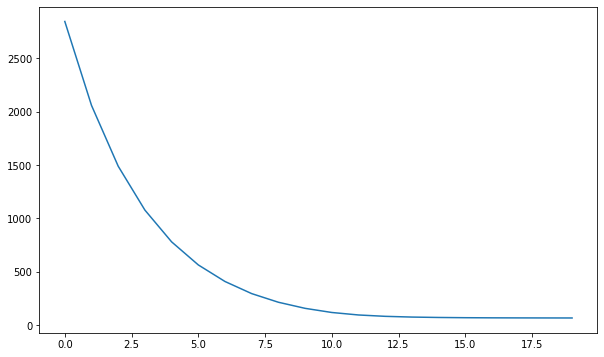

In [14]:
# check available metrics
model.metrics_names
# plot the MAE
plt.plot(model.history.history['mae'])

The MAE also decreases here, which is great! We would expect a model that fits well will decrease the mean absolute error as it starts to 'fit better'. The MSE will typically fit better since it is directly tied to the optimization, so this is just a sanity check. 

There are some other model summaries we can investigate, but they aren't all that useful. 

Calling the summary method gives us the architecture summary:

In [15]:
## summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We can also extract each weight. Once we have more complex models, this becomes less useful.

In [16]:
## extract weights
[layer.get_weights() for layer in model.layers]

[[array([[326.4403]], dtype=float32), array([3280.8223], dtype=float32)]]

One thing to note - if we were to rerun the model fitting code, it will inherit the current weight estimates, and the convergence plot will look odd:

Train on 500 samples
Epoch 1/20
500/500 [==============================] - 0s 346us/sample - loss: 6975.4213 - mae: 67.5627
Epoch 2/20
500/500 [==============================] - 0s 58us/sample - loss: 6961.2334 - mae: 67.4387
Epoch 3/20
500/500 [==============================] - 0s 60us/sample - loss: 6958.7280 - mae: 67.4253
Epoch 4/20
500/500 [==============================] - 0s 62us/sample - loss: 6953.5072 - mae: 67.3758
Epoch 5/20
500/500 [==============================] - 0s 62us/sample - loss: 6955.1221 - mae: 67.3633
Epoch 6/20
500/500 [==============================] - 0s 58us/sample - loss: 6953.2264 - mae: 67.3602
Epoch 7/20
500/500 [==============================] - 0s 66us/sample - loss: 6961.6321 - mae: 67.4327
Epoch 8/20
500/500 [==============================] - 0s 58us/sample - loss: 6954.7619 - mae: 67.3557
Epoch 9/20
500/500 [==============================] - 0s 62us/sample - loss: 6953.7834 - mae: 67.3546
Epoch 10/20
500/500 [==============================] - 0s 60

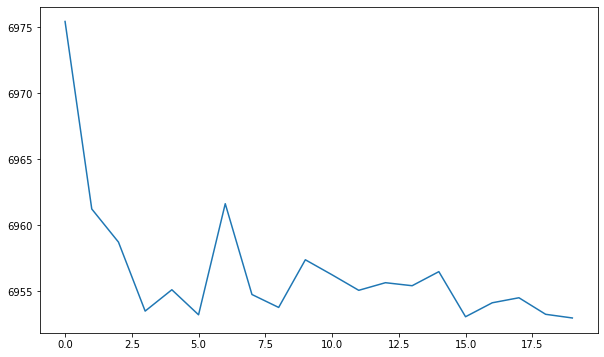

In [17]:
# fit this model/architecture to my data
model_history = \
    model.fit(x1_scale,
              y1,
              epochs=20,
              batch_size=20)
# plot the history
plt.plot(model.history.history['loss'])

What happened here? The model was already 'converged', so the initial weights were very close to the final solution. Now we just see the random noise that is the stochastic gradient descent algorithm dancing around the solution it found. The graph is automatically zoomed in, so it looks odd. But if you look at the values for the loss function, is it clear they are all near the minimum we already found. 

## Simulating a less linear model

Now we have an understanding of how the basic syntax in keras works, and we also have written the equivalent 'hello world' model and verified it works on a simple linear model. 

Let's start to simulate some increasingly complex linear models, and also explore a bit different keras syntax. 

In [18]:
## simulate polynomial model
np.random.seed(12)
import scipy.stats as ss
n = 1000
x2 = np.random.normal(loc=0,
                      scale=4,
                      size=n)
## simulate outcome
error_2 = \
    np.random.normal(loc=0,
                     scale=100,
                     size=n)
## map to outcome
y2 = (x2+3)*(x2-2)**2 + error_2

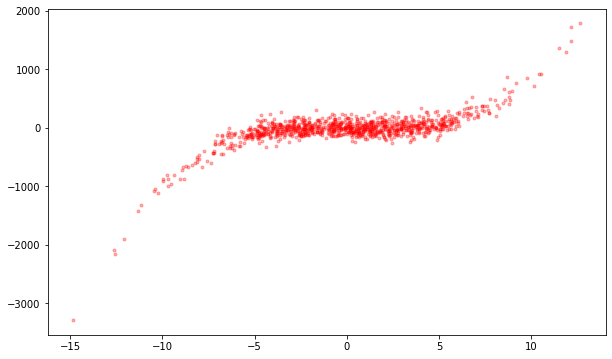

In [19]:
## plot this function
plt.plot(x2, y2,'r.',alpha=0.3)

I want to start by fitting a NN with the same architecture as before (mimicking a linear model). Instead of rebuilding the architecture every time, let's write a function that builds a model with that specific architecture, then call the function every time we want a model with that architecture. 

In [20]:
# build the model using a function since we will call it multiple times
def build_model1():
    '''build a simple NN which is identical to a linear model'''
    model = Sequential()
    model.add(Dense(1,
                    activation='linear',
                    input_dim=1))
    model.compile(optimizer='SGD',
                  loss='mse',
                  metrics=['mae'])
    return model

Now that we have a function for that model, we can simply call the function every time we want to initialize the model. We will also setup a transformer that scales the X's (the input). I will also start requesting the model be fit in silent mode to avoid the Epoch print. 

In [21]:
# Capture mean and stdev
# we will want to use this mean and stdev on future data!
x2_mean = np.mean(x2)
x2_std = np.std(x2)

In [22]:
# normalize the x values
x2_scale = norm(x2,x2_mean,x2_std)

In [23]:
# fit this model/architecture to my data
regr2 = build_model1()
regr2.fit(x2_scale,
          y2,
          epochs=20,
          verbose=0)

Now let's check out how the model converged by visualizing the loss function and MAE:

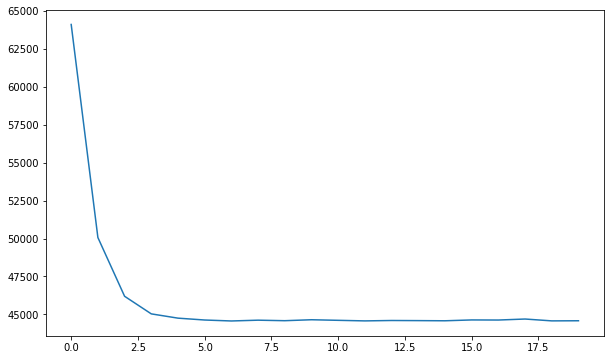

In [24]:
# plot the loss function per epoch
plt.plot(regr2.history.history['loss'])

The change in the loss function over time looks good, right? Seems like it converged? What about the MAE?

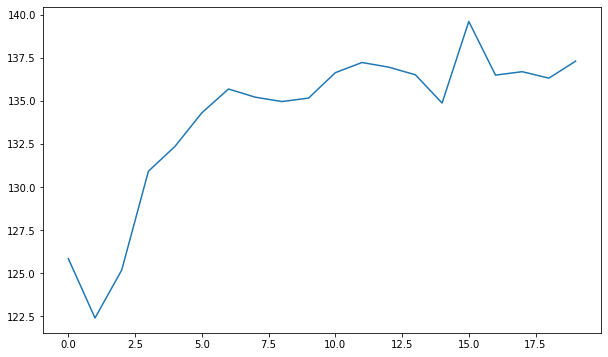

In [25]:
# plot the loss function per epoch
plt.plot(regr2.history.history['mae'])

The loss functions converged as expected, but the other metric (the MAE) is all over the place! What happened? Let's check the predictions to better understand:

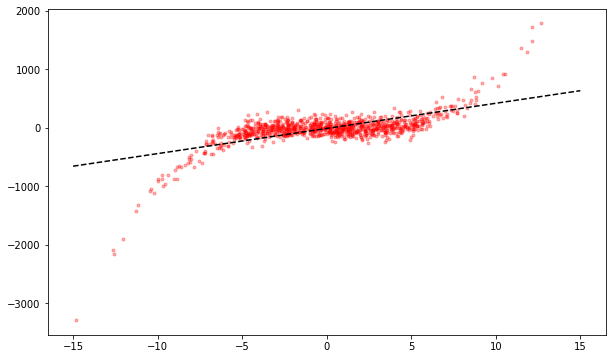

In [26]:
 # original data
plt.plot(x2, y2, 'r.', alpha=0.3)
# generate regular points along the range of x
x2_range = np.linspace(-15, 15, 200)
x2_range_scale = norm(x2_range,x2_mean,x2_std)
# make predictions and plot
plt.plot(x2_range,
         regr2.predict(x2_range_scale),
         'k--') 

As expected, the straight line of fit is not a good model here! This network lacks the **capacity** to fit the nonlinear function. 

We need to make the neural network a bit more complex (deeper or wider). Let's specify a new model architecture where there is a single hidden layer with 64 units, then retrain the model. 

I will keep the logging on this time (`verbose = 1`) to show you an issue that comes up. 

In [27]:
# build the model using a function since we would potentially call it multiple times
# add a single hidden dense layer with 64 units


def build_model2():
    '''build a NN with 1 hidden layer of 64 neurons, with a relu activation function'''
    model = Sequential()
    model.add(Dense(64,
                    activation='relu',
                    input_dim=1))
    model.add(Dense(1,
                    activation='linear'))
    model.compile(optimizer='SGD',
                  loss='mse',
                  metrics=['mae'])
    return model

In [28]:
# fit this model/architecture to my data
regr3 = build_model2()
regr3.fit(x2_scale,
          y2,
          epochs=20,
          verbose=1)

Train on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 0s 460us/sample - loss: nan - mae: nan     
Epoch 2/20
1000/1000 [==============================] - 0s 42us/sample - loss: nan - mae: nan
Epoch 3/20
1000/1000 [==============================] - 0s 41us/sample - loss: nan - mae: nan
Epoch 4/20
1000/1000 [==============================] - 0s 41us/sample - loss: nan - mae: nan
Epoch 5/20
1000/1000 [==============================] - 0s 41us/sample - loss: nan - mae: nan
Epoch 6/20
1000/1000 [==============================] - 0s 52us/sample - loss: nan - mae: nan
Epoch 7/20
1000/1000 [==============================] - 0s 42us/sample - loss: nan - mae: nan
Epoch 8/20
1000/1000 [==============================] - 0s 47us/sample - loss: nan - mae: nan
Epoch 9/20
1000/1000 [==============================] - 0s 40us/sample - loss: nan - mae: nan
Epoch 10/20
1000/1000 [==============================] - 0s 41us/sample - loss: nan - mae: nan
Epoch 11/20
1000/1000 [========

All of the loss function values per epoch and the MAE are `nan` - not a number. What happened? 

This is called the 'exploding gradient problem' - as the model was training, the gradient got very large, then the SGD routine could no longer find valid weights. We had a model convergence issue. This is not uncommon in regression problems in particular, due to the unbounded output. 

There is also something called the 'vanishing gradient problem', where the gradients get so small that we can't move away from that location and the convergence get's 'stuck' there. 

So what to do? The issue is the `SGD` optimizer in this case. Later in the notes I will demonstrate how to change specific parameters of the optimizer function. For now we will simply switch from 'SGD' to 'RmsProp', which usually helps with this issue and is a good default choice for a regression NN. Briefly, RMSProp uses information from prior gradients to normalize the current gradient. We will cover the optimizers more in depth in the next few sections. 

In [29]:
# build the model using a function since we would potentially call it multiple times
# add a single hidden dense layer with 64 units

def build_model3():
    '''build a NN with 1 hidden layer of 64 neurons, with a relu activation function'''
    model = Sequential()
    model.add(Dense(64,
                    activation='relu',
                    input_dim=1))
    model.add(Dense(1,
                    activation='linear'))
    model.compile(optimizer='RMSprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [30]:
# fit this model/architecture to my data
regr3 = build_model3()
regr3.fit(x2_scale,
          y2,
          epochs=20,
          verbose=1)

Train on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 535us/sample - loss: 77003.1204 - mae: 139.7526
Epoch 2/20
1000/1000 [==============================] - 0s 41us/sample - loss: 76903.0504 - mae: 139.6295
Epoch 3/20
1000/1000 [==============================] - 0s 45us/sample - loss: 76810.8647 - mae: 139.5201
Epoch 4/20
1000/1000 [==============================] - 0s 42us/sample - loss: 76721.7079 - mae: 139.4119
Epoch 5/20
1000/1000 [==============================] - 0s 41us/sample - loss: 76618.2648 - mae: 139.2951
Epoch 6/20
1000/1000 [==============================] - 0s 43us/sample - loss: 76514.0085 - mae: 139.1763
Epoch 7/20
1000/1000 [==============================] - 0s 49us/sample - loss: 76410.3777 - mae: 139.0505
Epoch 8/20
1000/1000 [==============================] - 0s 46us/sample - loss: 76296.1144 - mae: 138.9059
Epoch 9/20
1000/1000 [==============================] - 0s 48us/sample - loss: 76176.2603 - mae: 138.7706
Epoch 10/20
1000/1000 [

It looks like the convergence issues have gotten better - at least there is no evidence of an exploding gradient (the `nan's`). 

Let's look at the convergence history (the loss function over epochs):

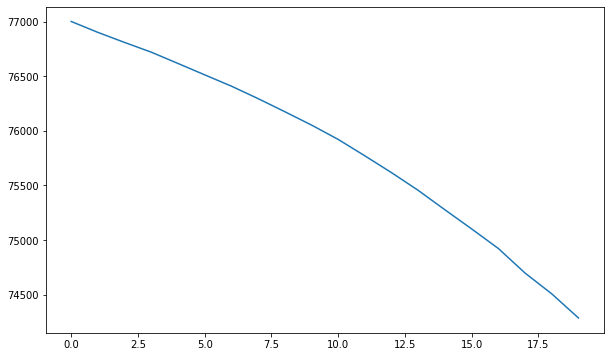

In [31]:
## plot the loss function
plt.plot(regr3.history.history['loss'])

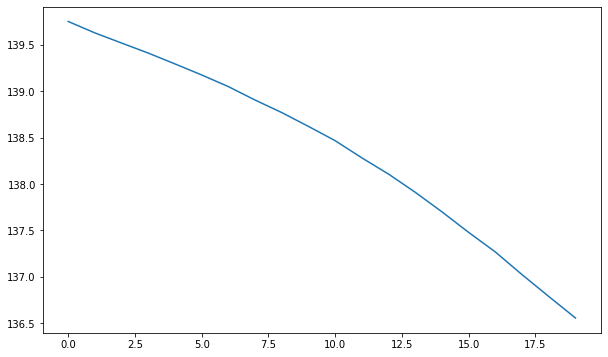

In [32]:
## plot the metrics
plt.plot(regr3.history.history['mae'])

What does that graph tell you about the fit thus far? Is the model done fitting? 

It is good the error is decreasing, but we have not reached the bottom yet, so we need to run the model for more epochs. Let's look at the predictions to confirm that:

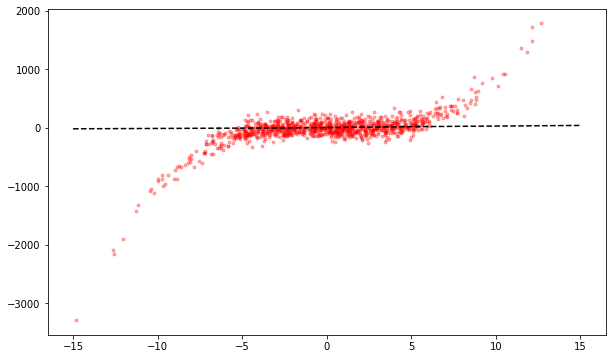

In [33]:
## original data
plt.plot(x2, y2,'r.',alpha=0.3)
## generate regular points along the range of x 
x2_range = np.linspace(-15,15,200)
x2_range_scale = norm(x2_range,x2_mean,x2_std)
## make predictions and plot
plt.plot(x2_range, 
         regr3.predict(x2_range_scale),
         'k--')

It still looks like a linear model! Let's try to run it for more epochs and check the fit. I am going to run it for 2000 epochs, you can change it to a lower number if it takes too long.

In [34]:
# fit this model/architecture to my data
regr3 = build_model3()
regr3.fit(x2_scale,
          y2,
          epochs=2000,
          verbose=0)

Let's look at the convergence history (the loss function over epochs):

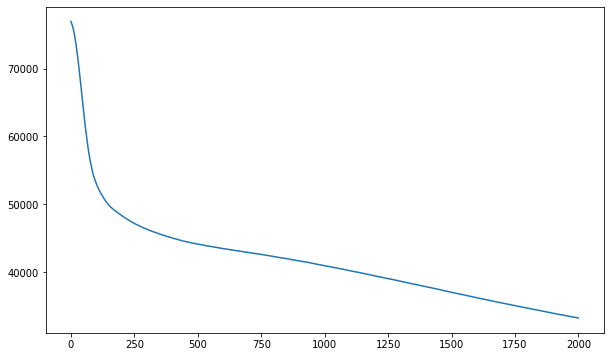

In [35]:
## plot the loss function
plt.plot(regr3.history.history['loss'])

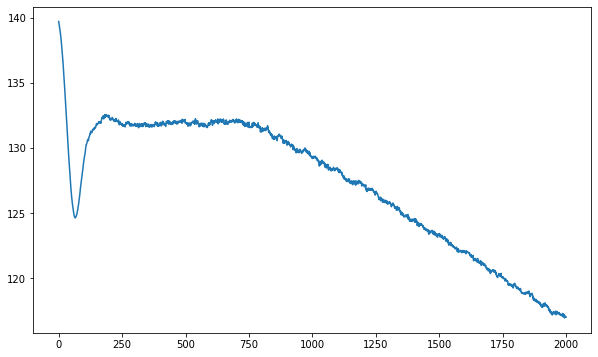

In [36]:
## plot the metrics
plt.plot(regr3.history.history['mae'])

What do you think about these graphs now? 

Let's look at the predicted values to understand how well it is fitting the curve. 

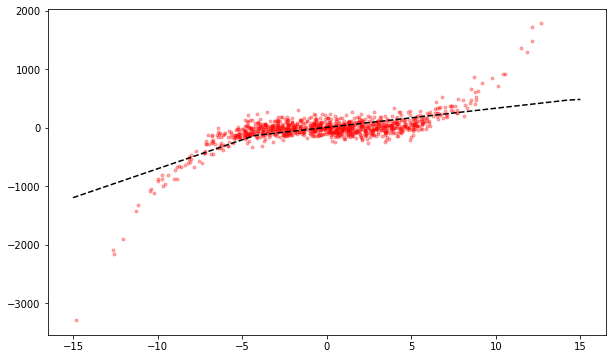

In [37]:
## original data
plt.plot(x2, y2,'r.',alpha=0.3)
## make predictions and plot
plt.plot(x2_range, 
         regr3.predict(x2_range_scale),
         'k--')

Still not that great! 

I think the issue is the architecture of the model. A single hidden layer with 64 neurons is not giving us enough model capacity to capture this non-linear curve. In theory, according to the 'universal approximation theorem', we only need one layer of a finite size. But that layer may be need to be *really* big...

Let's modify the architecture a bit more by adding some 'width' to the model, which just means add some more hidden layers. 

In [38]:
# build the model using a function since we would potentially call it multiple times


def build_model3():
    '''ANN model with 2 hidden layers with 64 neurons each and relu activation functions'''
    model = Sequential()
    model.add(Dense(64,
                    activation='relu',
                    input_dim=1))
    model.add(Dense(64,
                    activation='relu'))
    model.add(Dense(1,
                    activation='linear'))
    model.compile(optimizer='RMSprop',
                  loss='mse',
                  metrics=['mae'])
    return model

and we can now fit this to our data using 700 epochs. Again, if this takes too long, you could try less epochs

In [39]:
# fit this model/architecture to my data
regr4 = build_model3()
regr4.fit(x2_scale,
          y2,
          epochs=700,
          verbose=0)

It looks like the convergence issues have gotten better - at least there is no evidence of an exploding gradient (the `nan's`). 

Let's look at the convergence history (the loss function over epochs):

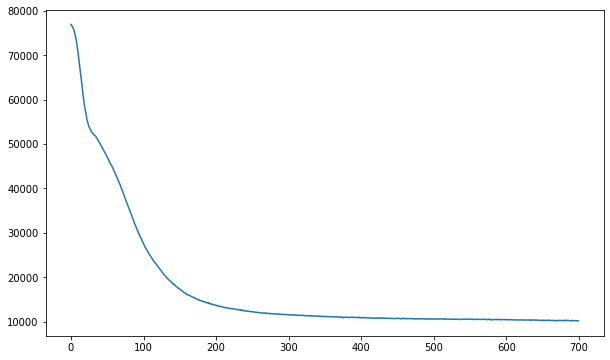

In [40]:
## plot the loss function
plt.plot(regr4.history.history['loss'])

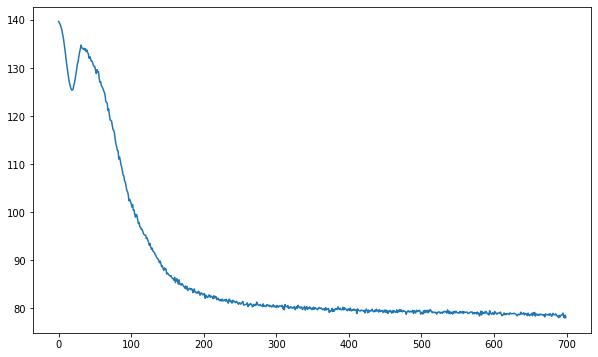

In [41]:
## plot the metrics
plt.plot(regr4.history.history['mae'])

What do you think about these graphs now? 

Let's look at the predicted values to understand how well it is fitting the curve. 

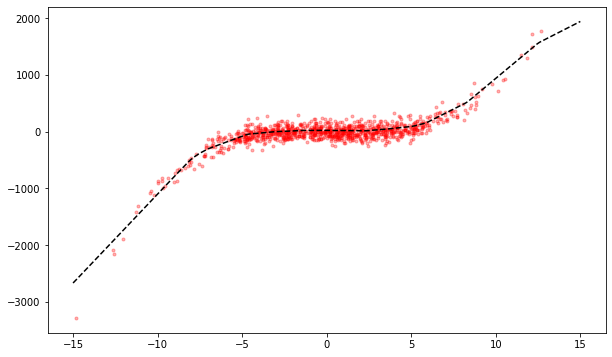

In [42]:
## original data
plt.plot(x2, y2,'r.',alpha=0.3)
## make predictions and plot
plt.plot(x2_range, 
         regr4.predict(x2_range_scale),
         'k--')

This looks much better! 

I want you to take a moment to look at the prior three graphs - the loss over epochs, the MAE over epochs, and finally the predicted values. 

In usual deep learning applications, we cannot make that third graph very easily. Instead of having one input we can easily graph, we have tens or hundreds or even *thousands* of inputs. We *can* always monitor the loss function over the epochs, and also any other metrics we want (like MAE). The more you do this work, the better the feel you will get for how model fit is going just by examining the loss over epochs. 

## Even more complex linear functions

Let's create a much harder to fit function and see what sort of neural network it takes to fit it. I am going to create a highly non-linear piecewise function that is not 'smooth'. 

It is a noisy sin curve, with a different function at a break point. 

In [43]:
## simulate non-linear model
np.random.seed(12)
n = 1000
x3 = np.random.normal(loc=0,
                      scale=3,
                      size=n)
## simulate outcome
error_3 = \
    np.random.normal(loc=0,
                     scale=0.8,
                     size=n)
## map to outcome
y3 = 2 + 3*np.sin(x3) + error_3
y3[x3>=0] = -4 + 3*(x3[x3>=0]) + error_3[x3>=0]


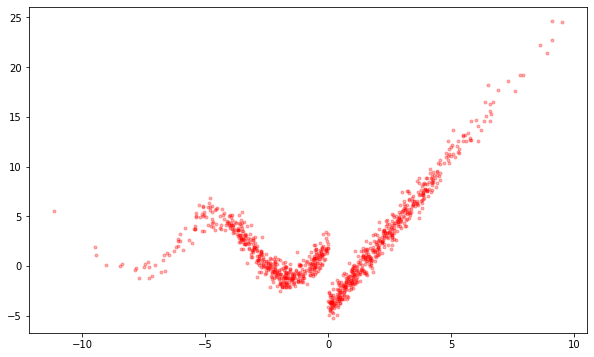

In [44]:
## original data
plt.plot(x3, y3,'r.',alpha=0.3)

Let's use the same architecture from the prior model as a starting point. 

Since we have new data, we need a new transformer to standardize the inputs: 

In [45]:
# Capture mean and stdev
# we will want to use this mean and stdev on future data!
x3_mean = np.mean(x3)
x3_std = np.std(x3)

In [46]:
# normalize the x values
x3_scale = norm(x3,x3_mean,x3_std)

In [47]:
# fit this model/architecture to my data
regr5 = build_model3()
regr5.fit(x3_scale,
          y3,
          epochs=500,
          verbose=0)

Let's look at the convergence history (the loss function over epochs):

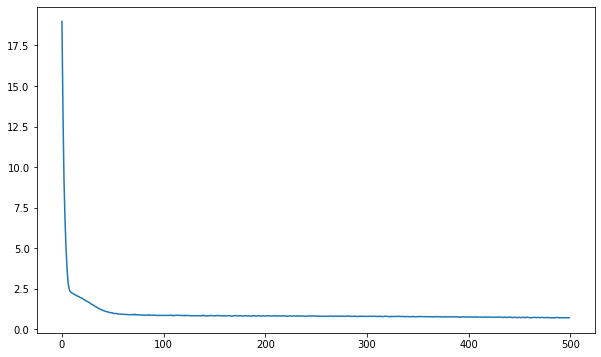

In [48]:
## plot the loss function
plt.plot(regr5.history.history['loss'])

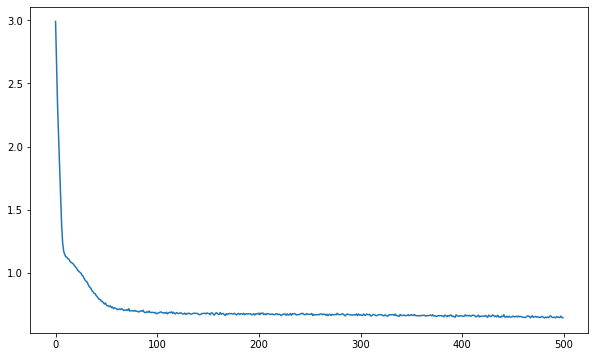

In [49]:
## plot the metrics
plt.plot(regr5.history.history['mae'])

What do you think about these graphs?  Do you see evidence of exploding gradients?

Let's look at the predicted values to understand how well it is fitting the curve. 

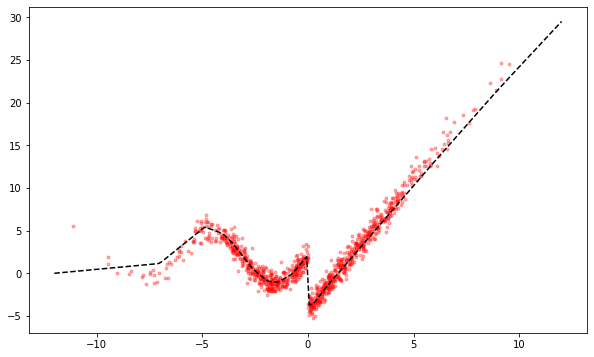

In [50]:
## original data
plt.plot(x3, y3,'r.',alpha=0.3)
## generate regular points along the range of x 
x3_range = np.linspace(-12,12,200)
x3_range_scale = norm(x3_range,x3_mean,x3_std)
## make predictions and plot
plt.plot(x3_range, 
         regr5.predict(x3_range_scale),
         'k--')

That looks pretty good! We are still missing the sin curve on the left side of the graph though. 

On your own, try to improve the model even more and pick up those predictions on the left side. You could try any of the following:

*  Train the current architecture for more epochs
*  Make the model deeper (more layers)
*  Make the model wider (more neurons per layer)

### Comparison between TensorFlow+Keras and PyTorch

PyTorch is a similar platform to TensorFlow. Originally developed at FaceBook, it was originally a Python API to the (no longer developed) Lua 'Torch' library. It has gained in popularity to compete with TensorFlow/Keras. 

Similarly based on a tensor representation of a computational network graph, a major difference is the architecture is inherently *dynamic*, *i.e.* the graph architecture may be altered during training (contrast this with the Keras computational graph, which is statically compiled). This can be great for Recurrent Neural Net (RNN) architectures that have a variable output shape (*e.g.* text generation, where word lengths vary). However, this does mean that the library is lower level than that for Keras.

One objection to PyTorch, compared to TensorFlow/Keras, was the relative difficulty of deploying the former in production. However, this is currently being improved upon. There is much overlap in functionality and performance between the two frameworks.

The PyTorch project may be found here: https://pytorch.org/

### Appropriate applications of Artificial Neural Networks

Because ANNs are 'universal approximators,' as well as based on a large number of small, simple, units, they are great where:
 * The relationships between variables are poorly understood or analytically complex
 * There is a lot of data
 
They are not so great because:
 * Principal features are not explicitly apparent; decisions are opaque for deep networks
 * They can be slow to train, requiring a number of epochs 

### Additional resources


**Websites:** 

  * Michael A. Neilsen's _Neural Nets and Deep Learning_: http://neuralnetworksanddeeplearning.com/
  * Ian Goodfellow, Yoshua Bengio and Aaron Courville's _Deep Learning_: http://www.deeplearningbook.org

**YouTube channels:**

 * Andrew Ng's _Machine Learning_: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN
 * Sentdex's _Practical Machine Learning with Python_: https://www.youtube.com/watch?v=OGxgnH8y2NM&index=1&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

**Platforms:** 

 * Kaggle: https://www.kaggle.com/
 * Coursera (Andrew Ng again): https://www.coursera.org/learn/machine-learning

## Conclusion

We have covered a lot in this lecture!

This was a very brief introduction to the field of artificial neural networks (ANNs) and Deep Learning! 

We have examined the theoretical justification for (ANNs), demonstrating that they are great 'universal approximators'. We also covered their use-cases and some of their pit-falls.

We also had a brief introduction to TensorFlow and Keras. We built a feed-forward network (a Multi-Layer Perceptron; MLP) to approximate complex functions. 

We also started to think about convergence issues that can occur while training a model, and we learned how to monitor the loss and the other metrics to understand how the convergence is going. 

We did all of this in the context of approximating strange functions of a single input. 

*  Why did we start here? How does the concept of using a NN to approximate a single non-linear function foundational to the general idea of machine learning? 

*  What have we left out here? Our goal in machine learning is not typically to just generate a machine that accurately predicts the observed data, right? 